In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the column names in the data set for Measurement.
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x151199180>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=366)
query_date
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement).filter(Measurement.date > query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame([result.__dict__ for result in results])
df = df.drop(columns=['_sa_instance_state'])

# Sort the dataframe by date
date_df = df.sort_values(by='date', ascending=True)
date_df.rename(columns={'tobs':'temp', 'prcp':'precipitation'}, inplace = True)
date_df

,temp,date,id,station,precipitation
0,81.0,2016-08-23,2364,USC00519397,0.00
1009,80.0,2016-08-23,8825,USC00517948,NaN
1529,77.0,2016-08-23,14608,USC00519281,1.79
704,80.0,2016-08-23,7331,USC00514830,0.05
361,76.0,2016-08-23,5091,USC00513117,0.15
...,...,...,...,...,...
1527,82.0,2017-08-22,12186,USC00519523,0.00
1008,82.0,2017-08-23,7635,USC00514830,0.00
360,81.0,2017-08-23,2724,USC00519397,0.00
1528,82.0,2017-08-23,12187,USC00519523,0.08


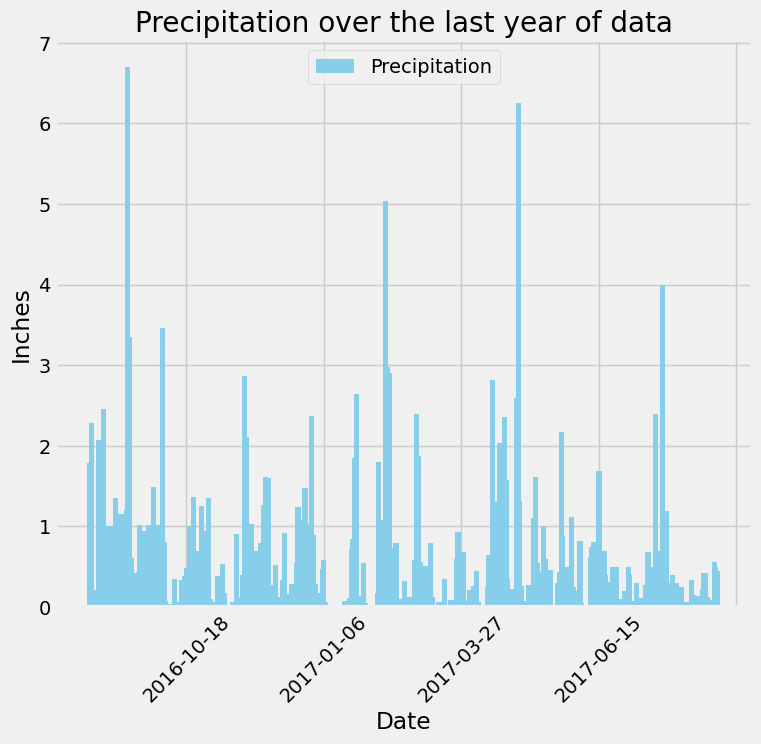

In [93]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plotting the bar chart
plt.figure(figsize=(8, 7))  # Optional: Set the figure size
plt.bar(date_df['date'], date_df['precipitation'], color='skyblue', width=3, label ='Precipitation')  
# Set x-axis major locator to show only specific dates
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=80)) 
# Rotate date labels for better readability
plt.xticks(rotation=45)

# Adding titles and labels
plt.title('Precipitation over the last year of data')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc = 'upper center')

# Display the bar chart
plt.show()

In [66]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = date_df['precipitation'].describe()
summary_stats_df= pd.DataFrame(summary_stats)
summary_stats_df

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [68]:
# Find the column names in the data set for Station.
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x169b16fe0>,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US'}

In [75]:
# Design a query to calculate the total number of stations in the dataset
total_count = session.query(func.count(func.distinct(Measurement.station))).scalar()
print(total_count)


9


In [81]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station).label('count')) \
    .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
# Convert results to a list
output_list = [(station, count) for station, count in station_count]

# Print the output list
print("Count of each station in descending order:")
for station, count in output_list:
    print(f"{station}: {count}")


Count of each station in descending order:
USC00519281: 2772
USC00519397: 2724
USC00513117: 2709
USC00519523: 2669
USC00516128: 2612
USC00514830: 2202
USC00511918: 1979
USC00517948: 1372
USC00518838: 511


In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_tobs = session.query(func.min(Measurement.tobs)) \
                  .filter(Measurement.station == 'USC00519281').scalar()
max_tobs = session.query(func.max(Measurement.tobs)) \
                  .filter(Measurement.station == 'USC00519281').scalar()
avg_tobs = session.query(func.avg(Measurement.tobs)) \
                  .filter(Measurement.station == 'USC00519281').scalar()

print(f"The lowest temp for station 'USC00519281' is: {min_tobs}")
print(f"The highest temp for station 'USC00519281' is: {max_tobs}")
print(f"The average temp for station 'USC00519281' is: {avg_tobs}")

The lowest temp for station 'USC00519281' is: 54.0
The highest temp for station 'USC00519281' is: 85.0
The average temp for station 'USC00519281' is: 71.66378066378067


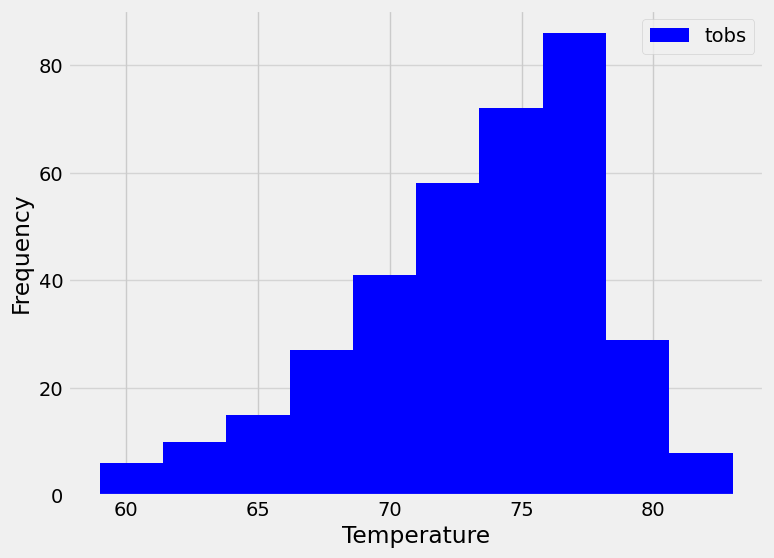

In [94]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement).filter(Measurement.date > query_date).filter(Measurement.station == 'USC00519281').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
station_df = pd.DataFrame([result.__dict__ for result in results])
station_df = station_df.drop(columns=['_sa_instance_state'])

# Sort the dataframe by date
date2_df = station_df.sort_values(by='date', ascending=True)
#date2_df

# Create a histogram of the 'tobs' column
plt.figure(figsize=(8, 6))  
plt.hist(date2_df['tobs'], color='blue', label = 'tobs')  

# Adding titles and labels
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')
plt.grid(axis='y', alpha=0.75)

# Display the histogram
plt.show()


# Close Session

In [95]:
# Close Session
session.close()